*# RNN LAB WEEK 13
# Step 1: Load and Preprocess the Dataset
# We'll use a simple sine wave dataset for this exercise.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Generate a sine wave dataset
def generate_sine_wave_data(seq_length, num_samples):
    x = np.linspace(0, 100, num_samples)
    y = np.sin(x)
    return x, y

seq_length = 50
num_samples = 1000
x, y = generate_sine_wave_data(seq_length, num_samples)


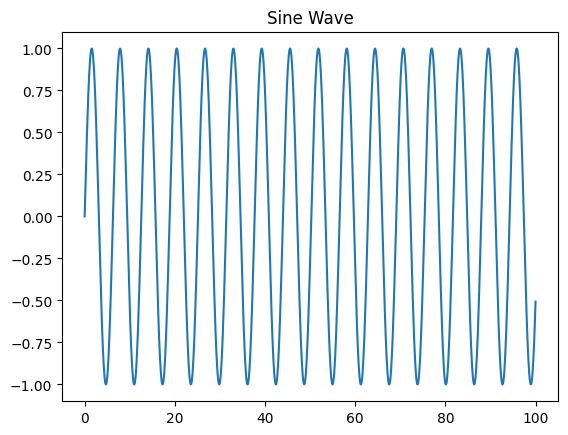

In [ ]:
# Plot the sine wave
plt.plot(x, y)
plt.title("Sine Wave")
plt.show()


In [ ]:
# Prepare the dataset for RNN
def create_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_dataset(y, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for RNN

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (950, 50, 1)
y shape: (950,)


Step 2: Build the RNN Model
We'll use TensorFlow/Keras to build a simple RNN model.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [ ]:
# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Step 3: Train the RNN Model
Split the dataset into training and testing sets and train the model.


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
24/24 [==============================] - 2s 22ms/step - loss: 0.4131 - val_loss: 0.1880
Epoch 2/20
24/24 [==============================] - 0s 14ms/step - loss: 0.0874 - val_loss: 0.0199
Epoch 3/20
24/24 [==============================] - 1s 31ms/step - loss: 0.0047 - val_loss: 5.1309e-04
Epoch 4/20
24/24 [==============================] - 1s 26ms/step - loss: 3.7520e-04 - val_loss: 2.8740e-04
Epoch 5/20
24/24 [==============================] - 1s 27ms/step - loss: 1.5976e-04 - val_loss: 1.2705e-04
Epoch 6/20
24/24 [==============================] - 0s 20ms/step - loss: 1.1165e-04 - val_loss: 9.2362e-05
Epoch 7/20
24/24 [==============================] - 0s 20ms/step - loss: 8.1256e-05 - val_loss: 6.4292e-05
Epoch 8/20
24/24 [==============================] - 1s 21ms/step - loss: 6.6527e-05 - val_loss: 6.2407e-05
Epoch 9/20
24/24 [==============================] - 0s 16ms/step - loss: 5.3490e-05 - val_loss: 4.9325e-05
Epoch 10/20
24/24 [==============================] - 0s 1

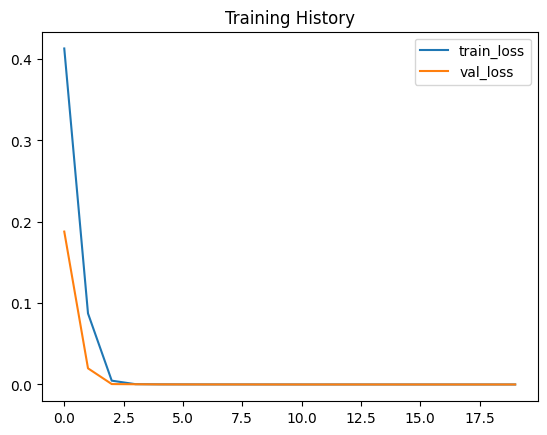

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training History')
plt.show()


Step 4: Evaluate the Model's Performance
Evaluate the model on the test set.

In [ ]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


Step 5: Make Predictions
Use the trained model to make predictions.


In [ ]:
# Make predictions
predictions = model.predict(X_test)


6/6 [==============================] - 0s 4ms/step


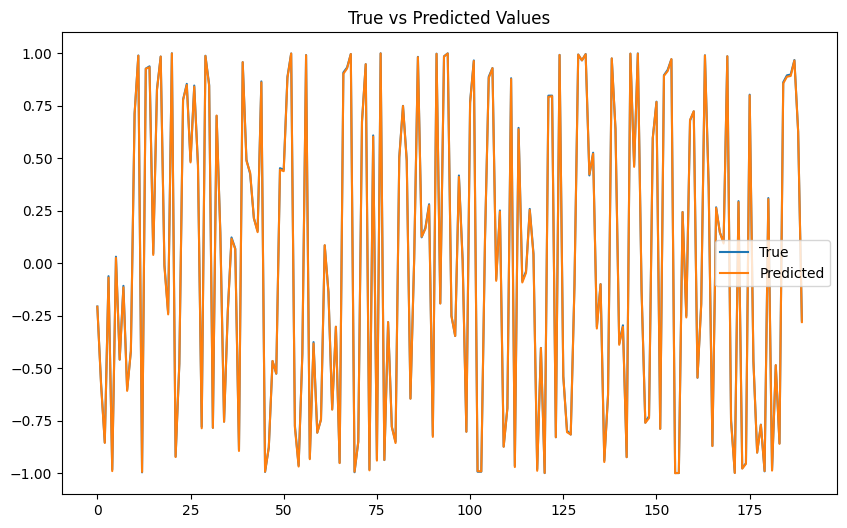

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('True vs Predicted Values')
plt.show()